# **Importing Libraries And Dataset**

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [27]:
df = pd.read_csv("/content/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [28]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [30]:
df.shape

(200, 5)

# **Fitting K-Means**

In [31]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

In [32]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [33]:
wcss = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# **Elbow Plot**

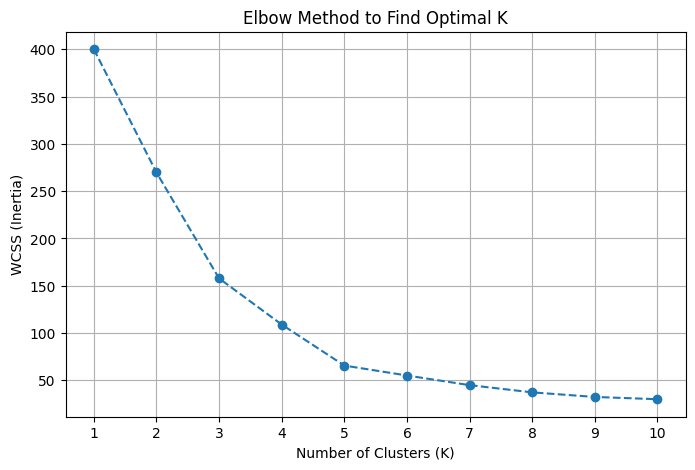

In [34]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method to Find Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [35]:
optimal_k = 5
print(f"Fitting K-Means with Optimal K = {optimal_k}")

kmeans_final = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
cluster_labels = kmeans_final.fit_predict(X_scaled)
centroids = kmeans_final.cluster_centers_

Fitting K-Means with Optimal K = 5


# **Visualizing Clusters**

In [36]:
df['Cluster'] = cluster_labels

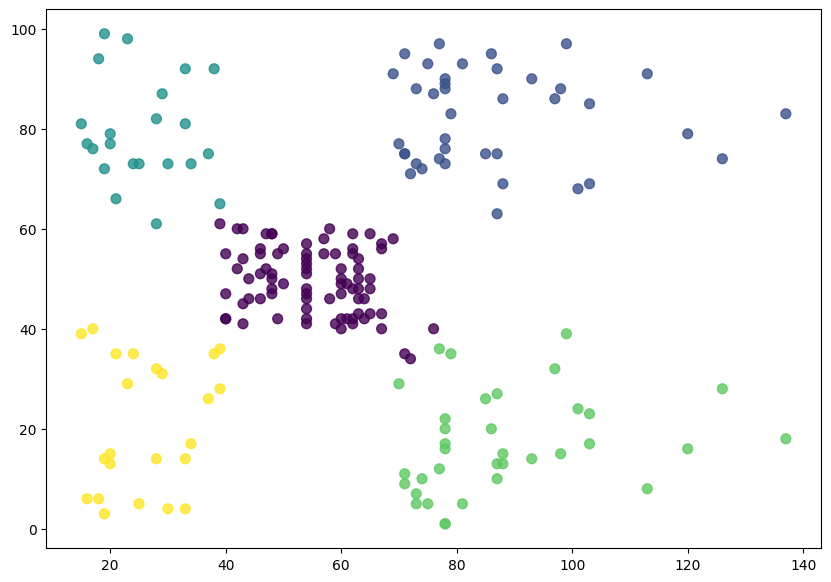

In [37]:
plt.figure(figsize=(10, 7))

plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.8)

X_mean = df['Annual Income (k$)'].mean()
X_std = df['Annual Income (k$)'].std()
Y_mean = df['Spending Score (1-100)'].mean()
Y_std = df['Spending Score (1-100)'].std()
centroids_original_scale = np.array([
    centroids[:, 0] * X_std + X_mean,
    centroids[:, 1] * Y_std + Y_mean
]).T

# **Silhouette Score**

In [38]:
score = silhouette_score(X_scaled, cluster_labels)
print(f"Silhouette Score for K={optimal_k}: {score:.5f}")

Silhouette Score for K=5: 0.55466
